In [2]:
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017/")
db = client.test_database
collection = db.crypto_collection

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import os
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
#import cdata.mongodb as mod
import plotly.graph_objs as go

## Hyperparameters

In [5]:
PRODUCT_ID = "ETH-USD"
SHOW_DATA = False

In [6]:
collection.count()

632164

In [7]:
collection.count({"type":"ticker"})

5186

In [8]:
ticker = collection.find_one({"type":"ticker", "product_id":PRODUCT_ID})

In [9]:
if SHOW_DATA == True:
    print(ticker)

In [10]:
if SHOW_DATA == True:
    print(list(ticker.keys()))

In [23]:
df = pd.DataFrame.from_dict(collection.find({"type":"ticker"}))

In [24]:
if SHOW_DATA == True:
    print(df.head())

In [25]:
if SHOW_DATA == True:
    df.info()

In [26]:
df['date_time_float'] = pd.to_datetime(df.time).astype(int) / 10**9

In [27]:
df.price = df.price.astype(float)
df.open_24h = df.open_24h.astype(float)
df.volume_24h = df.volume_24h.astype(float)
df.low_24h = df.low_24h.astype(float)
df.high_24h = df.high_24h.astype(float)
df.volume_30d = df.volume_30d.astype(float)
df.best_bid = df.best_bid.astype(float)
df.best_ask = df.best_ask.astype(float)
df.trade_id = df.trade_id.astype(int)
df.time = pd.to_datetime(df.time)

In [28]:
if SHOW_DATA == True:
    df.info()

In [29]:
if SHOW_DATA == True:
    df.describe()

In [30]:
df.product_id.value_counts()

BTC-USD    2874
ETH-USD    1470
ETH-BTC     450
ETH-EUR     392
Name: product_id, dtype: int64

In [31]:
coin = df.loc[df.product_id == PRODUCT_ID,:]
if SHOW_DATA == True:
    print(coin.info())

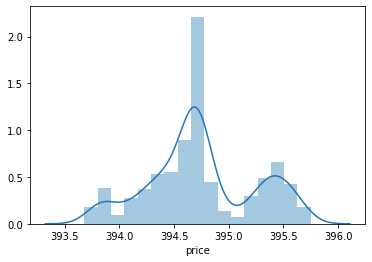

In [32]:
sns.distplot(coin.price)

In [33]:
coin.price.mean()

394.74438095238014

Check the distribution of time among data to see if the data are evenly spread

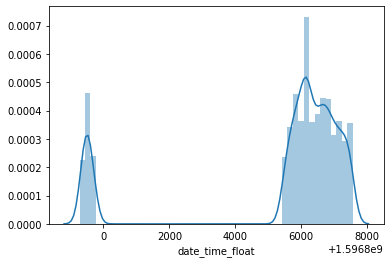

In [35]:
sns.distplot(df.date_time_float)

# Dash

In [36]:
app_name = 'dash-mongodbedataplot'
 
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
 
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = 'CData + Dash'

In [37]:
trace = go.Bar(x=df.price, y=df.product_id, name='price')
 
app.layout = html.Div(children=[html.H1("CData Extension + Dash", style={'textAlign': 'center'}),
dcc.Graph(
id='example-graph',
figure={
'data': [trace],
'layout':
go.Layout(title='MongoDB restaurants Data', barmode='stack')
})
], className="container")

In [38]:
app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
